# Titanic - Machine Learning from Disaster - Parte 4


- [Dados disponíveis no Kaggle](https://www.kaggle.com/competitions/titanic)
    - É um dataset de **competição**
    - O resultado é avaliado através da **acurácia**:
        - _"Sua pontuação é a porcentagem de passageiros que você prevê corretamente. Isso é conhecido como acurácia."_

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Visualizando a base de treino
treino = pd.read_csv('train.csv')
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# Visualizando a base de teste
teste = pd.read_csv('test.csv')
teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


- Fazendo o mesmo tratamento inicial que fizemos nas colunas vazias

In [4]:
# Eliminando as colunas com elevada cardinalidade
treino = treino.drop(['Name','Ticket','Cabin'],axis=1)
teste = teste.drop(['Name','Ticket','Cabin'],axis=1)

In [5]:
# Usando a média para substituir valores nulos na coluna de idade
treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean()
teste.loc[teste.Age.isnull(),'Age'] = teste.Age.mean()

In [6]:
# Tratando a coluna Embarked da base de treino usando a moda 
treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

In [7]:
# E também a coluna Fare da base de teste usando a média
teste.loc[teste.Fare.isnull(),'Fare'] = teste.Fare.mean()

- E fazendo a engenharia de variáveis dos nossos dados

In [8]:
# Usando uma lambda function para tratar a coluna "Sex"
treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [9]:
# Fazendo o RobustScaler das colunas Age e Fare
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(treino[['Age','Fare']])
treino[['Age','Fare']] = transformer.transform(treino[['Age','Fare']])

# e para a base de teste
transformer = RobustScaler().fit(teste[['Age','Fare']])
teste[['Age','Fare']] = transformer.transform(teste[['Age','Fare']])

In [10]:
# Adicionando a coluna sozinho
def sozinho(a,b):
    if (a == 0 and b == 0):
        return 1
    else:
        return 0
    
treino['Sozinho'] = treino.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)
teste['Sozinho'] = teste.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

In [11]:
# E criando a coluna de familiares
treino['Familiares'] = treino.SibSp + treino.Parch
teste['Familiares'] = treino.SibSp + treino.Parch

In [12]:
# Fazendo o OrdinalEncoder para a coluna Embarked
from sklearn.preprocessing import OrdinalEncoder
categorias = ['S','C','Q']

enc = OrdinalEncoder(categories=[categorias],dtype='int32')
enc = enc.fit(treino[['Embarked']])
treino['Embarked'] = enc.transform(treino[['Embarked']])

teste['Embarked'] = enc.transform(teste[['Embarked']])

In [13]:
# Apagando as colunas de texto
treino = treino.drop('Sex',axis=1)
teste = teste.drop('Sex',axis=1)

- Visualizando a base resultante

In [14]:
# Visualizando a base de treino
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
0,1,0,3,-0.592240,1,0,-0.312011,0,1,0,1
1,2,1,1,0.638529,1,0,2.461242,1,0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0,1,0


### Utilizando outros modelos para fazer a previsão

In [15]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [16]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

In [17]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

- Para a **Regressão Logística**

In [18]:
# Importando
from sklearn.linear_model import LogisticRegression

In [19]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42)

In [20]:
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)

In [21]:
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)

- Para o **Random Forest**

In [22]:
# Importando
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Criando o classificador
clf_rf = RandomForestClassifier(random_state=42)

In [24]:
# Fazendo o fit com os dados
clf_rf = clf_rf.fit(X_train,y_train)

In [25]:
# Fazendo a previsão
y_pred_rf = clf_rf.predict(X_val)

- E para o **MLPClassifier (Redes Neurais)**

In [26]:
# Importando
from sklearn.neural_network import MLPClassifier

In [27]:
# Criando o classificador
clf_mlp = MLPClassifier(random_state=42,max_iter=5000)

In [28]:
# Fazendo o fit com os dados
clf_mlp = clf_mlp.fit(X_train,y_train)

In [29]:
# Fazendo a previsão
y_pred_mlp = clf_mlp.predict(X_val)

- Vamos novamente **avaliar os modelos**
    - Acurácia (método de avaliação usado na competição):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - Matriz de confusão (ajuda a visualizar a distribuição dos erros):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

- Avaliando a **acurácia**

In [30]:
# Importando
from sklearn.metrics import accuracy_score

In [31]:
# Para a Regressão Logística
accuracy_score(y_val, y_pred_rl)

0.8067796610169492

In [32]:
# Para o Random Forest
accuracy_score(y_val, y_pred_rf)

0.7898305084745763

In [33]:
# Para o MLPClassifier (Redes Neurais)
accuracy_score(y_val, y_pred_mlp)

0.8305084745762712

- Avaliando a **matriz de confusão**

In [34]:
# Importando
from sklearn.metrics import confusion_matrix

In [35]:
# Para a Regressão Logística
confusion_matrix(y_val, y_pred_rl)

array([[152,  23],
       [ 34,  86]], dtype=int64)

In [36]:
# Para o Random Forest
confusion_matrix(y_val, y_pred_rf)

array([[148,  27],
       [ 35,  85]], dtype=int64)

In [37]:
# Para o MLPClassifier (Redes Neurais)
confusion_matrix(y_val, y_pred_mlp)

array([[160,  15],
       [ 35,  85]], dtype=int64)

### Fazendo a previsão para os dados de teste
- Vamos usar o modelo com melhor precisão para fazer o predict na base de teste

In [38]:
# Visualizando o X_train
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
6,1,1.869299,0,0,1.620136,0,1,1,0
718,3,0.000000,0,0,0.045293,2,1,1,0
685,2,-0.361471,1,2,1.174771,1,1,0,3


In [39]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
0,892,3,0.331562,0,0,-0.280670,2,1,1,1
1,893,3,1.311954,1,0,-0.315800,0,0,0,1
2,894,2,2.488424,0,0,-0.201943,2,1,1,0


In [40]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop('PassengerId',axis=1)

In [41]:
# Utilizando o melhor modelo na base de teste
y_pred = clf_mlp.predict(X_teste)

In [42]:
# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

In [43]:
# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]

In [44]:
# Exportando para um csv
base_envio.to_csv('attempt4_mlp.csv',index=False)

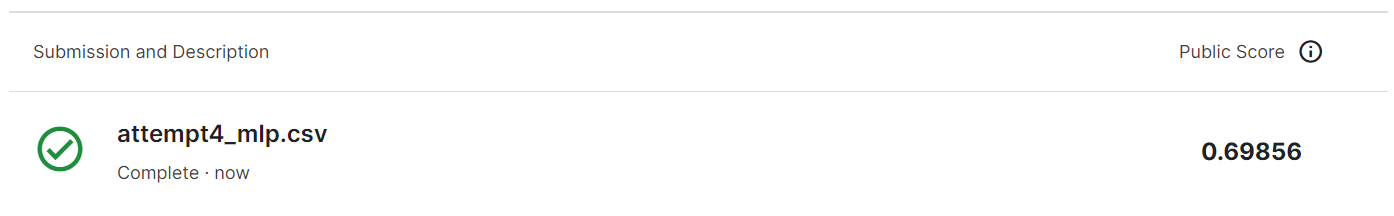